In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv('HR.csv')
df = data.copy()

In [33]:
df.shape

(14999, 10)

In [34]:
#remove duplicates
df = df.drop_duplicates()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


In [37]:
#change column name
df.rename(columns = {'sales':'department'},inplace=True)

In [38]:
df['Work_accident'] = df['Work_accident'].replace(0 , 'No')
df['Work_accident'] = df['Work_accident'].replace(1 , 'Yes')

df['left'] = df['left'].replace(0 , 'No')
df['left'] = df['left'].replace(1 , 'Yes')

df['promotion_last_5years'] = df['promotion_last_5years'].replace(0 , 'No')
df['promotion_last_5years'] = df['promotion_last_5years'].replace(1 , 'Yes')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  object 
 6   left                   11991 non-null  object 
 7   promotion_last_5years  11991 non-null  object 
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.0+ MB


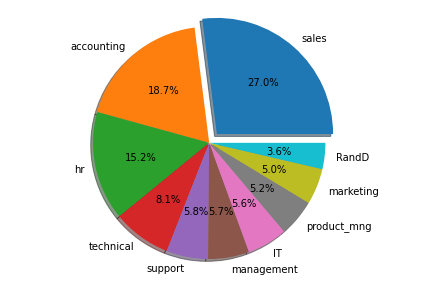

In [40]:
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  
fig1, ax1 = plt.subplots()


plt.pie(df.department.value_counts(),explode=explode,labels = list(df.department.unique()), 
        autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

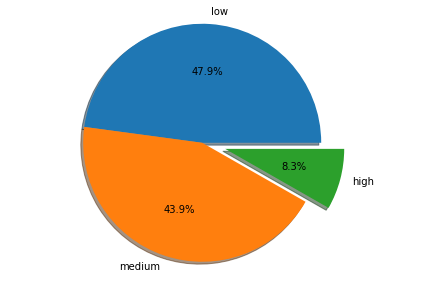

In [41]:
explode = (0, 0, 0.2)  
fig1, ax1 = plt.subplots()


plt.pie(df.salary.value_counts(),explode=explode,labels = list(df.salary.unique()), 
        autopct='%1.1f%%',shadow=True)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

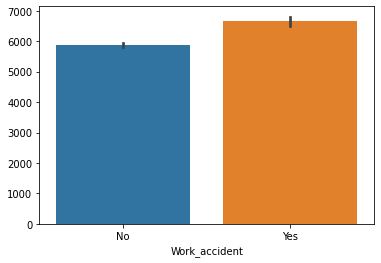

In [42]:
sns.barplot(df.Work_accident,df.Work_accident.index);

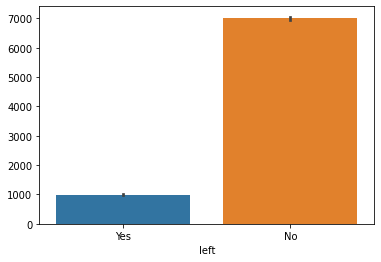

In [43]:
sns.barplot(df.left,df.left.index);


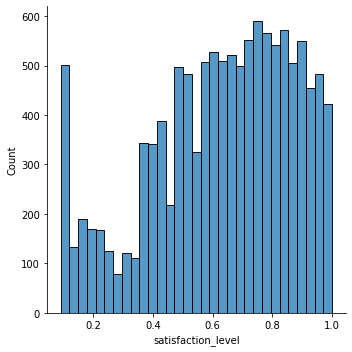

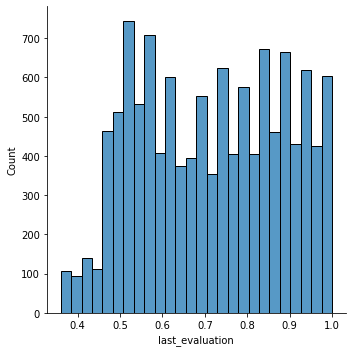

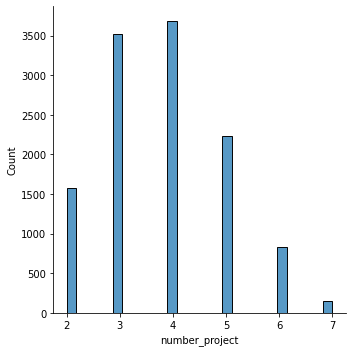

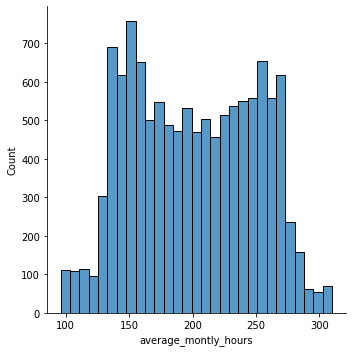

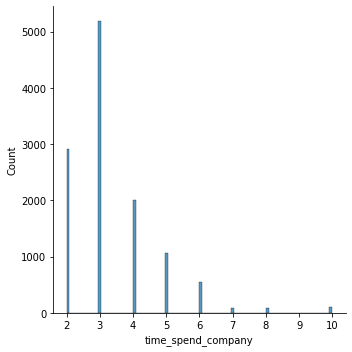

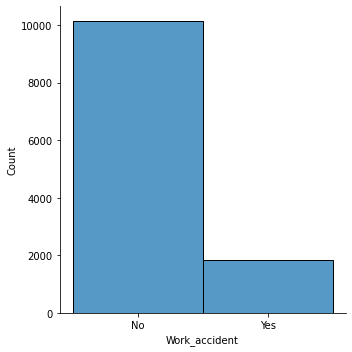

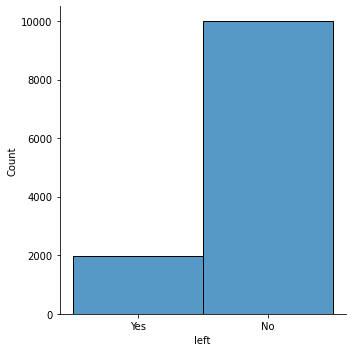

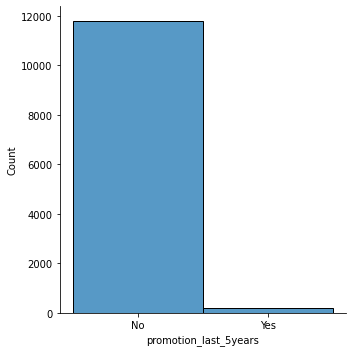

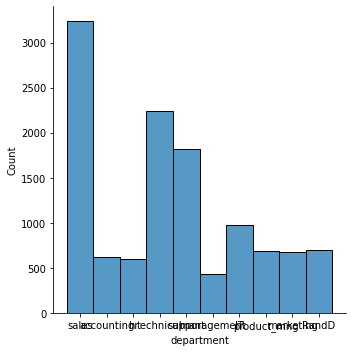

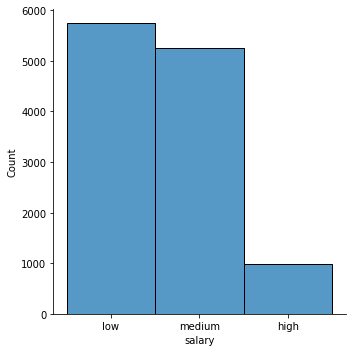

In [44]:
for column in df:
     sns.displot(x=column, data=df)

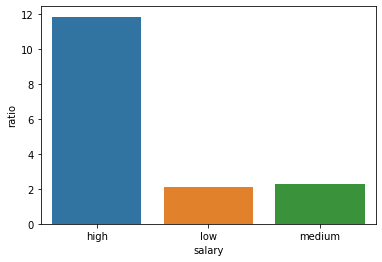

In [45]:
d_df = pd.DataFrame(df.groupby('salary')['satisfaction_level'].agg('sum')).reset_index()
sum_of_stLevel = d_df['satisfaction_level'].sum()
d_df['ratio'] = d_df['satisfaction_level'].apply(lambda x: sum_of_stLevel/x)
sns.barplot(x = d_df.salary,y=d_df.ratio);

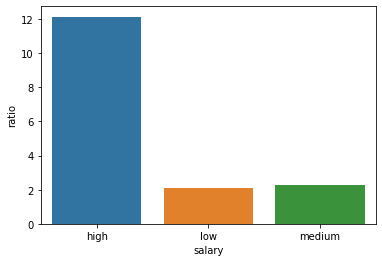

In [46]:
d_df = pd.DataFrame(df.groupby('salary')['average_montly_hours'].agg('sum')).reset_index()
sum_of_stLevel = d_df['average_montly_hours'].sum()
d_df['ratio'] = d_df['average_montly_hours'].apply(lambda x: sum_of_stLevel/x)
sns.barplot(x = d_df.salary,y=d_df.ratio);

<AxesSubplot:>

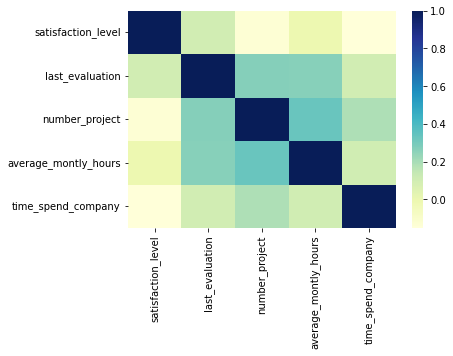

In [18]:
sns.heatmap(df.corr(),cmap="YlGnBu" )

In [48]:
df.to_csv('HR_cleaned.csv',index=False)
